<a href="https://colab.research.google.com/github/priyal-khapra/Beginner-Projects-DL/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 5.9 kB/s 


In [ ]:
import tensorflow as tf 
print(tf.__version__)

2.8.2


In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv("/content/Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# divide the dataset into independent and dependent features
# in the independent features[x] we have neglected the first three cols as they are not significant for the classification problem
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
###### DEMO OF HOW GET DUMMY WORKS ####### 
##### NOT REALLY A PART OF THE CODE #####
pd.get_dummies(X["Geography"])

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [ ]:
# feature engineering (handling the categorical features)
# 2 ways for feature engineering in this case: one hot encoding or get dummies
# we dropped one of the columns because, when the rest of the columns are both 0, that would mean that the dropped column was 1, so instead of keeping 3 rows in this case (for france, spain and germany), we are keeping only 2
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
# Part 2 - Now let's make the ANN!

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [ ]:
# Initialising the ANN
classifier = Sequential()

In [ ]:
# Adding the input layer and the first hidden layer
# relu will be applied to the next upcoming layer(after the input layer)
classifier.add(Dense(units=11,activation='relu'))

In [ ]:
# Adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [ ]:
# Adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))
# classifier.add(Dense(units=1,activation='relu'))

In [ ]:
# adding the output layer
classifier.add(Dense(units=1,activation = "sigmoid"))
# for binary classification problems,  we have learnt that sigmoid layer is used in the last layer

In [ ]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# INTRODUCING THE CONCEPT OF EARLY STOPPING 
# EARLY STOPPING MAKES SURE THAT WHEN THE ACCURACY IS NOT INCREASING MUCH, AUTOMATICALLY THE TRAINING WILL STOP AND NOT PROCESS THE UPCOMING EPOCHS
# Stops training when a monitored metric has stopped improving.
early_stopping  = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.01,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [ ]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50,callbacks=early_stopping)

Epoch 1/50
536/536 [==============================] - 6s 4ms/step - loss: 0.5463 - accuracy: 0.7697 - val_loss: 0.4615 - val_accuracy: 0.7952
Epoch 2/50
536/536 [==============================] - 2s 3ms/step - loss: 0.4422 - accuracy: 0.8054 - val_loss: 0.4361 - val_accuracy: 0.8099
Epoch 3/50
536/536 [==============================] - 2s 4ms/step - loss: 0.4206 - accuracy: 0.8186 - val_loss: 0.4247 - val_accuracy: 0.8164
Epoch 4/50
536/536 [==============================] - 2s 4ms/step - loss: 0.4091 - accuracy: 0.8293 - val_loss: 0.4176 - val_accuracy: 0.8198
Epoch 5/50
536/536 [==============================] - 3s 5ms/step - loss: 0.3998 - accuracy: 0.8304 - val_loss: 0.4081 - val_accuracy: 0.8270
Epoch 6/50
536/536 [==============================] - 2s 3ms/step - loss: 0.3912 - accuracy: 0.8364 - val_loss: 0.4020 - val_accuracy: 0.8319
Epoch 7/50
536/536 [==============================] - 2s 4ms/step - loss: 0.3833 - accuracy: 0.8431 - val_loss: 0.3962 - val_accuracy: 0.8315
Epoch 

In [ ]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


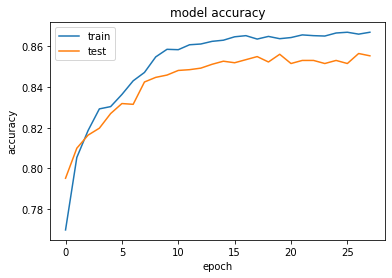

In [ ]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

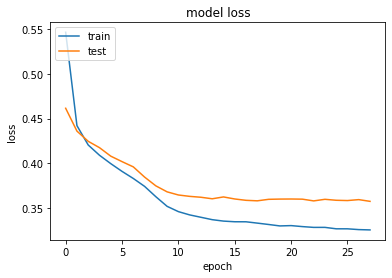

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1486,  109],
       [ 186,  219]])

In [ ]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [ ]:
score

0.8525

In [ ]:
# to get the values of weights 
# NOT REALLY A PART OF THE CODE
classifier.get_weights()

[array([[ 0.00238911,  0.28588587,  0.0977214 , -0.30547768, -0.08137014,
         -0.30983377,  0.02846531,  0.00905937,  0.2768088 ,  0.41419214,
          0.10701078],
        [-0.0646246 , -0.5101077 ,  0.09047229, -0.72466666,  0.80279386,
         -0.6272462 ,  0.5844834 , -0.02888129,  0.06684139, -0.5222646 ,
         -0.7581444 ],
        [ 0.04826899,  0.03391059, -0.25087008,  0.2890131 , -0.0833442 ,
         -0.04134895,  0.07555055, -0.00531025,  0.39703208, -0.2763432 ,
         -0.03982652],
        [ 1.0435374 ,  0.08681507,  0.4491742 , -0.07283816, -0.3736431 ,
          0.34646598,  0.05769066,  0.22264004, -0.6949627 ,  0.06229457,
          0.05368312],
        [ 0.77649885,  0.58502334, -0.54219407,  0.4532702 , -0.35545847,
          0.50021344,  0.31649584,  1.2349741 , -0.01986344,  0.13451733,
          0.5857074 ],
        [ 0.18637526,  0.37090912, -0.03766773, -0.0031468 , -0.05042797,
         -0.30252084,  0.02221978, -0.03889555, -0.08587885,  0.2253840